## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [42]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



In [4]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
boston = pd.read_csv(data_url)
x = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [5]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=100)

In [8]:
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(x_train, y_train);

y_train_pred = regr.predict(x_train)
y_test_pred = regr.predict(x_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
print('Treino: ',mse_train)
print('Treino: ',mse_test)

Treino:  9.072380100452017
Treino:  24.868514670647716


In [21]:
novo_imovel = [0.00632,	18.0,	2.31,	0,	0.538,	7.575,	65.2,	4.0900,	1,	296,	15.3,	396.90,	4.98]
previsao = regr.predict([novo_imovel])
print('Previsão: ',previsao);

Previsão:  [46.41578947]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [60]:
path = regr.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha = path.ccp_alphas

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [61]:
arvores= []
for ccp_alphas in ccp_alpha:
  regr = DecisionTreeRegressor(ccp_alpha=ccp_alphas, max_depth=4)
  regr.fit(x_train, y_train);
  arvores.append(regr)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [62]:
for arvore in arvores:
  train = mean_squared_error(y_train , arvore.predict(x_train))
  test = mean_squared_error(y_test , arvore.predict(x_test))
  print(train)
  print(test)
  print('---------')

9.072380100452019
25.88187458391051
---------
9.072380100452017
26.51242576501287
---------
9.422413387074668
24.074763946921614
---------
9.422413387074668
25.65253330900331
---------
9.815433372805735
23.294448287120417
---------
11.064319402947538
23.394504440939492
---------
11.064319402947534
23.394504440939492
---------
13.761260477782985
23.64719850154325
---------
15.174170779442623
27.143371540421064
---------
15.174170779442623
27.143371540421064
---------
17.22460968750027
29.034587169255186
---------
19.330312707256407
35.2754695354143
---------
28.230003911056805
45.99010307334351
---------
42.04592819783731
62.095684949081395
---------
42.04592819783731
62.0956849490814
---------


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

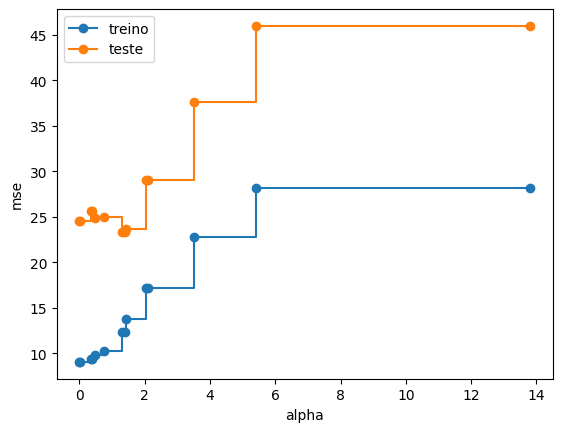

In [94]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('mse')
ax.plot(ccp_alpha[:-1], treino[:-1], label='treino', marker='o', drawstyle="steps-post" )
ax.plot(ccp_alpha[:-1], teste[:-1], label='teste', marker='o', drawstyle="steps-post" )
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [97]:
arvore2 = DecisionTreeRegressor(random_state=100, ccp_alpha=2)
arvore2.fit(x_train, y_train);

arvore2.score(x_test, y_test)

0.7249171603869979

### 7. Visualize esta árvore.

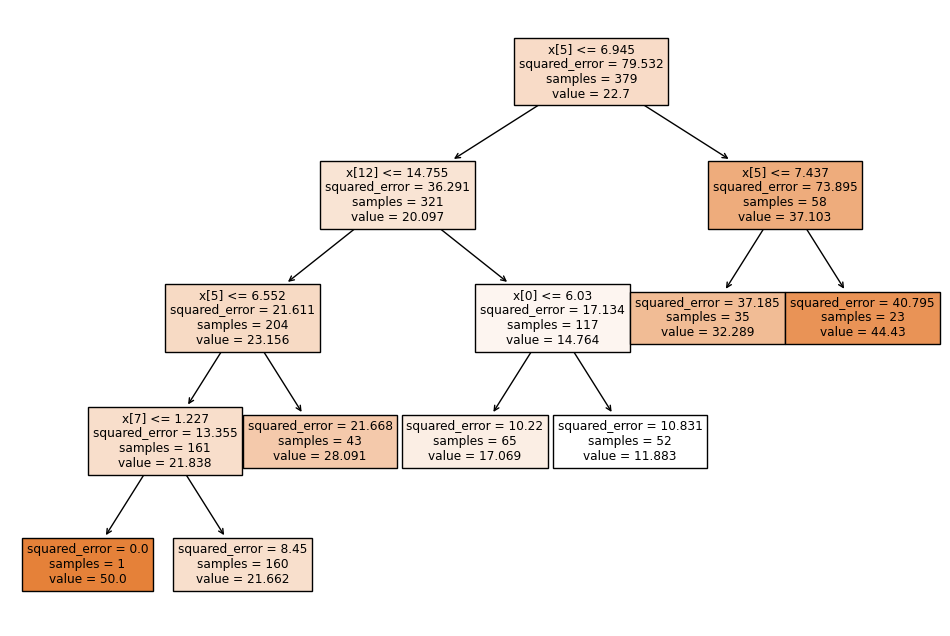

In [98]:
fig, ax = plt.subplots(figsize=(12, 8))
tree.plot_tree(arvore2, filled=True, ax=ax);